In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
data = pd.read_excel("caschool.xlsx")
data.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


<AxesSubplot:>

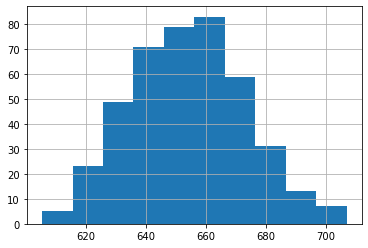

In [6]:
data.testscr.hist()

In [7]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [8]:
normaltest(data.testscr.values)

NormaltestResult(statistic=1.7477124875701222, pvalue=0.4173390809731915)

#### Log transform

In [9]:
log_testscr = np.log(data.testscr)

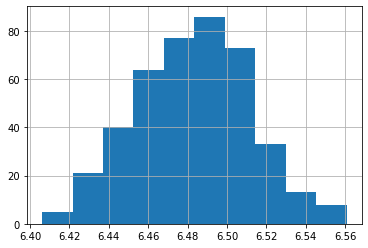

In [10]:
log_testscr.hist();

In [11]:
normaltest(log_testscr)

NormaltestResult(statistic=1.404769712873947, pvalue=0.4954024301856593)

#### Square root transform

(array([ 5., 22., 45., 68., 77., 84., 66., 32., 13.,  8.]),
 array([24.60792654, 24.8056109 , 25.00329525, 25.2009796 , 25.39866396,
        25.59634831, 25.79403266, 25.99171702, 26.18940137, 26.38708572,
        26.58477008]),
 <BarContainer object of 10 artists>)

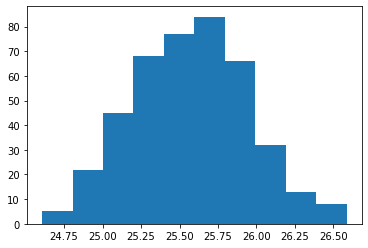

In [12]:
sqrt_testscr = np.sqrt(data.testscr)
plt.hist(sqrt_testscr)

In [13]:
normaltest(sqrt_testscr)

NormaltestResult(statistic=1.4963705863719965, pvalue=0.47322453780319285)

#### Box cox transform

In [14]:
from scipy.stats import boxcox

In [15]:
bc_result = boxcox(data.testscr)
boxcox_testscr = bc_result[0]
lam = bc_result[1]
lam

-0.20718063106851395

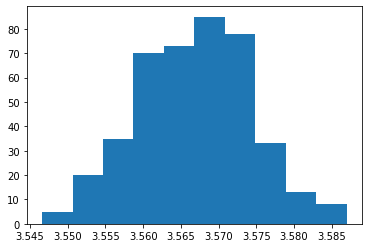

In [16]:
plt.hist(boxcox_testscr);

In [17]:
normaltest(boxcox_testscr)

NormaltestResult(statistic=1.411882390136503, pvalue=0.4936437404868109)

### Results

In [18]:
print('Original:', normaltest(data.testscr.values))
print('Log:', normaltest(log_testscr))
print('sqrt:', normaltest(sqrt_testscr))
print('Box cox:', normaltest(boxcox_testscr))

Original: NormaltestResult(statistic=1.7477124875701222, pvalue=0.4173390809731915)
Log: NormaltestResult(statistic=1.404769712873947, pvalue=0.4954024301856593)
sqrt: NormaltestResult(statistic=1.4963705863719965, pvalue=0.47322453780319285)
Box cox: NormaltestResult(statistic=1.411882390136503, pvalue=0.4936437404868109)


### Testing regression:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [20]:
lr = LinearRegression()

In [21]:
data2 = data.drop(columns=['Observation Number', 'dist_cod', 'county', 'district', 'gr_span', 'teachers', 'computer', 'read_scr', 'math_scr'])

In [22]:
y_col = "testscr"

X = data2.drop(y_col, axis=1)
y = data[y_col]

In [23]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [25]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [26]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [27]:
y_train_bc.shape

(294,)

In [28]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [29]:
from scipy.special import inv_boxcox

In [30]:
bc_result = boxcox(data.testscr)
boxcox_testscr = bc_result[0]
lam = bc_result[1]

In [31]:
inv_boxcox(boxcox_testscr, lam)[:10]

array([690.79998779, 661.20001221, 643.59997559, 647.70001221,
       640.84997559, 605.55004883, 606.75      , 609.        ,
       612.5       , 612.65002441])

In [32]:
data['testscr'].values[:10]

array([690.79998779, 661.20001221, 643.59997559, 647.70001221,
       640.84997559, 605.55004883, 606.75      , 609.        ,
       612.5       , 612.65002441])

In [33]:
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.7331773891667661

In [34]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.7331408671451505

## Regularization

In [35]:
y_col = "testscr"

X = data2.drop(y_col, axis=1)
y = data2[y_col]

In [36]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

In [37]:
lr = LinearRegression()

y_col = "testscr"

X = data2.drop(y_col, axis=1)
y = data2[y_col]

In [38]:
lr.fit(X, y)
print(lr.coef_) 

[ 4.80481618e-07 -7.78483305e-02 -3.75603484e-01  1.18926174e+01
  1.52620963e-03 -1.90191900e-01  6.21627034e-01 -1.98179400e-01]


In [39]:
s = StandardScaler()
X_ss = s.fit_transform(X)

In [40]:
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_)

[ 1.87793538e-03 -8.90676464e-01 -1.01755011e+01  7.71574414e-01
  9.66368337e-01 -3.59378682e-01  4.48645784e+00 -3.61957741e+00]


In [41]:
pd.DataFrame(zip(X.columns, lr2.coef_)).sort_values(by=1)

,0,1
2,meal_pct,-10.175501
7,el_pct,-3.619577
1,calw_pct,-0.890676
5,str,-0.359379
0,enrl_tot,0.001878
3,comp_stu,0.771574
4,expn_stu,0.966368
6,avginc,4.486458


In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

In [44]:
X_pf_ss = s.fit_transform(X_pf)

In [45]:
las = Lasso()
las.fit(X_pf_ss, y)
las.coef_ 

array([-0.        , -0.        , -7.41164504,  0.        ,  0.        ,
       -0.        ,  0.        , -2.65135554, -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.20037582, -0.        , -0.        , -0.        ,
       -0.        , -3.7519646 , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.19455398, -0.        ,  0.        ,
        0.        ,  4.04534271, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ])

In [46]:
las01 = Lasso(alpha = 0.1)
las01.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 23.02014225579139
number of coefficients not equal to 0: 16


In [47]:
las1 = Lasso(alpha = 1)
las1.fit(X_pf_ss, y)
print('sum of coefficients:',abs(las1.coef_).sum() )
print('number of coefficients not equal to 0:',(las1.coef_!=0).sum())

sum of coefficients: 18.255237685509556
number of coefficients not equal to 0: 6


In [48]:
from sklearn.metrics import r2_score
r2_score(y,las.predict(X_pf_ss))

0.8048739846496389

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [51]:
X_train_s = s.fit_transform(X_train)
las.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las.predict(X_test_s)
r2_score(y_pred, y_test)

0.7684883116138533

In [52]:
X_train_s = s.fit_transform(X_train)
las01.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las01.predict(X_test_s)
r2_score(y_pred, y_test)

0.779624369021843

In [53]:
### BEGIN SOLUTION

# Part 1

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())
### END SOLUTION

r2 score for alpha = 0.001: 0.7368368397390408
r2 score for Linear Regression: 0.7331408671451505
Magnitude of Lasso coefficients: 390.77332631426543
Number of coeffients not equal to 0 for Lasso: 44
Magnitude of Linear Regression coefficients: 465.85558612870943
Number of coeffients not equal to 0 for Linear Regression: 44


In [54]:
from sklearn.linear_model import Ridge

In [55]:
### BEGIN SOLUTION
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_
### END SOLUTION

array([-1.38336103e+01, -2.56390395e+01,  5.94951603e+01, -1.22585777e+01,
       -9.17110237e+00, -2.01924852e+01, -2.54721158e+00, -4.79059969e+01,
       -4.52834671e+00,  2.43847624e+00,  5.18531911e+00, -8.90781879e-01,
       -9.98707406e-01,  2.74321645e+00,  1.02877112e+01,  2.69586978e+00,
       -4.13533957e+00,  1.63039664e+01, -2.73619331e-02,  8.20258060e+00,
        8.64962035e+00, -3.86251373e-01, -1.34703696e+00, -2.17903788e+01,
        1.48682530e+00, -2.10538120e+01, -2.75539523e+01, -7.01308534e+00,
        1.33058814e+01, -1.97025332e+00,  7.75733138e+00,  7.86454429e+00,
       -1.47390231e+00, -1.47565489e+00, -2.34863152e+00,  6.87738151e+00,
        1.59738511e+01,  1.98597341e+01,  1.29985085e+01,  4.40027800e+00,
        1.21290511e+01, -8.79148047e+00,  2.55366295e+00, -4.62989946e-01])

In [56]:
las001 # same alpha as Ridge above

Lasso(alpha=0.001, max_iter=100000)

In [57]:
las001.coef_

array([-15.20914721, -19.1895099 ,  49.71549585,  -9.21153412,
        -6.45434787, -14.52517764,  -2.20693199, -41.12183151,
        -4.4829006 ,   2.46934481,   4.81310781,  -0.88432198,
        -0.08281709,   3.53631581,  10.11944019,   2.84466609,
        -3.8597941 ,  15.5096711 ,   0.16990517,   5.29141358,
         5.39579415,  -0.70480994,  -1.14918791, -21.20070973,
         1.0974367 , -16.4298935 , -22.39659218,  -6.63262359,
        12.75406969,  -1.90583138,   6.34521255,   6.25527512,
        -1.66427395,  -1.31631801,  -2.80207101,   5.14297268,
        15.81351281,  16.68926694,   9.25529642,   4.15240844,
         8.77391489,  -8.61473212,   2.20487523,  -0.37857296])

In [58]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

459.0049601966884
390.77332631426543
44
44


In [59]:
y_pred = r.predict(X_pf_ss)
print(r2_score(y, y_pred))

y_pred = las001.predict(X_pf_ss)
print(r2_score(y, y_pred))

0.8162020062262078
0.817022230253253


### Regularization

In [60]:
data2

,enrl_tot,calw_pct,meal_pct,testscr,comp_stu,expn_stu,str,avginc,el_pct
0,195,0.510200,2.040800,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,15.416700,47.916698,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,55.032299,76.322601,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,36.475399,77.049202,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,33.108601,78.427002,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677
...,...,...,...,...,...,...,...,...,...
415,984,0.101600,3.556900,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935
416,3724,1.074100,1.503800,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101
417,441,3.563500,37.193802,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039
418,101,11.881200,59.405899,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression()

In [63]:
# Extract the X- and Y- data from the dataframe 
X_data = data2.drop('testscr', axis=1)
Y_data = data2['testscr']

In [64]:
# Create the features and fit the model
# X_poly = pf.fit_transform(X_data)
#lr = lr.fit(X_poly, Y_data)
#Y_pred = lr.predict(X_poly)


In [65]:
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
#degree = 20
#pf = PolynomialFeatures(degree)
#lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
#X_data = data2.drop('testscr', axis=1)
#Y_data = data2['testscr']

# Create the features and fit the model
#X_poly = pf.fit_transform(X_data)
#lr = lr.fit(X_poly, Y_data)
#Y_pred = lr.predict(X_poly)

# Plot the result
#plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
#plt.plot(X_real, Y_real, ls='--', label='real function')
#plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
#plt.legend()
#ax = plt.gca()
#ax.set(xlabel='x data', ylabel='y data');
